## Tarea 2: Simple linear regression using TensorFlow in Python
##### Universidad de Monterrey
##### Carlos Jahir Sanchez Cruz
##### Ingeniero industrial y de sistemas (IIS)
##### Maestro: Andres Hernandez Gutierrez
##### Monterrey, Nuevo Leon, 29 de agosto 2024
##### "Doy mi palabra que he realizado esta actividad con integridad academica"

#### Introduccion
##### A lo largo del presente trabajo, se describirá la función de cada comando del código, con el fin de conocerlos y familiarizarnos con ellos para aplicarlos en clases futuras.

### Desarrollo
#### Importar librerias

##### Esta parte del codigo importa diversas bibliotecas o librerias.
- Numpy: Esta linea de codigo importa la biblioteca NumPy, dicha biblioteca es indispesanble para calculos numericos en python. NumPy nos permite trabajar con matrices y arrays de manera rapida y eficaz
- Pandas: De igual manera esta linea importa una libreria llamada pandas, dicha herramienta es sumamente util para la manipulacion y analisis de datos en Python.
- Tensorflow: Tensorflow es una plataforma de codigo abierto para el aprendizaje automatico y redes neutonales, esto es utilizada para contruir, entrenar y desplegar modelos de machine learning a gran escala.
- Matplotlib.pyplot: La biblioteca Matplotlib nos ayuda a crear graficas en 2D, de igual manera animadas e interactivas
- sklearn: Es una de las bibliotecas mas populares para aprendizaje autonomo en python
- train_test_split: Esta libreria se utiliza para divdir un conjunto de datos en dos subconjutos. estos dos subconjuntos se dividen en entrenamiento y otro de prueba de rendimiento.   

In [1]:
#import files 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Esta parte del codigo basicamente genera datos sinteticos basados en una relacion lineal, la cual contiene ruido o desviacion estandar aleatoria.
- def: Este comando nos ayuda a definir una nueva funcion.
- generate_data: Es el nombre de la funcion. al momento de llamarla mas adelante en el codigo podra ejecutar las instrucciones que contiene.
- true_coeffs_np.array([10, 1]): es un array de Numpy que contiene coeficientes verdaderos de una funcion lineal. en este caso [10,1]. Donde el valor de 10 representa la ordenada al origen  y el 1 es la pendiente de la linea
- noise_std=2 Es un argumento con un valor predeterminado, el cual representa la desviacion estandar del ruido que se añadiran a los datos para poder ver en base asimulacion la variabilidad de los datos.
- num_samples=100: esta expresion mostrara la cantidad de datos se generaran en este caso seran 100.
- np.random.seed (4500): Esta linea establece una semilla, la cual asegura que cada vez que se ejecute el codigo, se generaran los mismos numeors aleatorios
- np.arange(0,100,1): Es una funcion que genera un array con valores de 0 a 99
- true_coeffs[0] + true_coefss[1]* x: esto representa la formula de la linea recta.  
- return: Este comando indica que la funcion devolvera un valor cuando se mande a llamar 

In [2]:
def generate_data(true_coeffs=np.array([10,1]), noise_std=2, num_samples=100):

    #seed for reproducibility
    np.random.seed(4500)

    #Generate synthetic data
    x= np.arange(0,100, 1)
    y= true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)

    #Return features and response
    return (x,y)

#### Esta parte del codigo genera datos sinteticos para un problema de regresion lineal simple y define la realcion lineal donde y=10+1*x y definiendo una desviacion de 5
- true_coeffs: como ya se menciono esta variable almacena los coeficientes verdaderos de la relacion lineal que se utilizaran para generar datos.
- np.array([10, 1]): Tambien antes mencionado crea un array donde el 10 es ordenada de origen y el 1 es la pendiente de la recta.
-noise_std: esta varaible tambien antes mencionada almacena la desviacion estandar de los datos
- true_coeffs=true_coeffs: Pasa los coeficientes verdaderos previamente definidos ( 10, 1)
- noise_std=noise_std: Pasa la desviacion estandar a su valor de 5 para añadir la variabilidad 
- num_samples=100 genera 100 datos 


In [4]:
#Generate a synthetic data for simple linear regression
true_coeffs = np.array([10, 1])
noise_std= 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)


#### Este codigo genera un grafico de dispersion que visualiza los datos creados anteriormente.

- plt.figure(): Crea una nueva figura para ver el grafico
- figsize=(10, 7): Especifica el tamaño de la figura en pulgadas, con un ancho de 10 y una altura de 7
- plt.scatter(x,y): Genera un grafico de dispercion, con los datos generados anteriormente.
- plt.xlabel(r"$x$"): Establece la etiqueta del eje x
- plt.ylabel("$f_{\mathbf{w}}(x)$" Establece la etiqueta del eje y
- plt.title(rf"$f_{{\mathbf{{w}}}}(x) {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$"): Establece el titulo de la grafica
- fontsize=20: define ele tamaño de la etiqueta
- plt.legend(): Muestra la leyenda del grafico.
- plt.show: Muestra el grafico en la pantalla.

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\fcoom\AppData\Local\Temp\ipykernel_1696\3547086850.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)


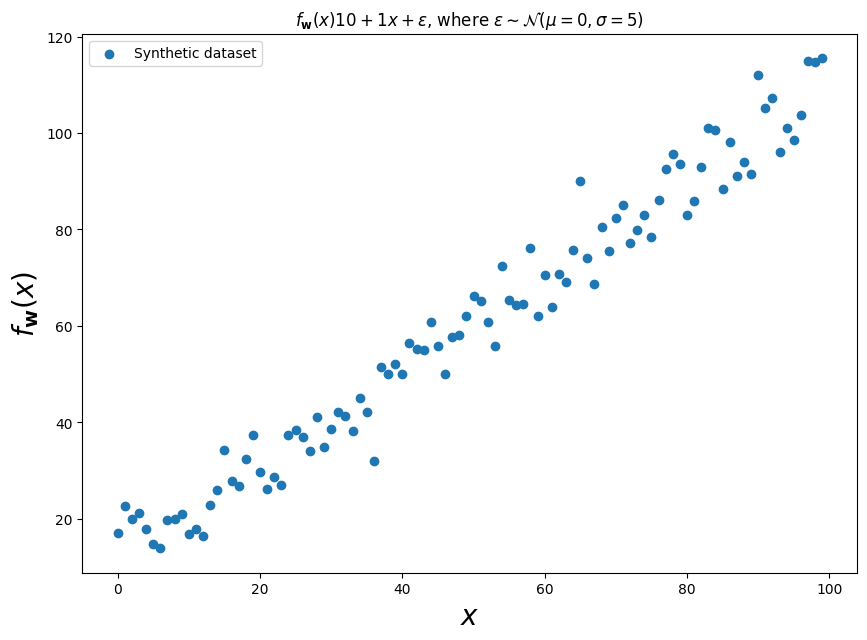

In [5]:
#Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label= 'Synthetic dataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$")
fontsize=20
plt.legend()
plt.show()

#### Este codigo basicamente es igual al anterior, el cual genera una grafica de los datos sinteticos, pero ahora los datos de entrenamiento y de prueba se ven diferenciados por un color azul y rojo.

- test_size=0.2: Basicamente esto representa que los 20 % de los datos seran de prueba y el 80% de un conjunto de entrenamiento.
-random_state=42 : fija la semilla del generador de numeros aleatorios para asegurar que la division sea reproducible 
- shuffle=True: Los dats se mezclan antes de dividirlos

#### Las unicas diferencias con el codigo anterior de la grafica son las siguientes:

- plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0]): Este comando dibuja el grafico de dispersion de losdatos de entrenamiento etiquetado como "training dataset" en color rojo

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\fcoom\AppData\Local\Temp\ipykernel_1696\196778647.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)


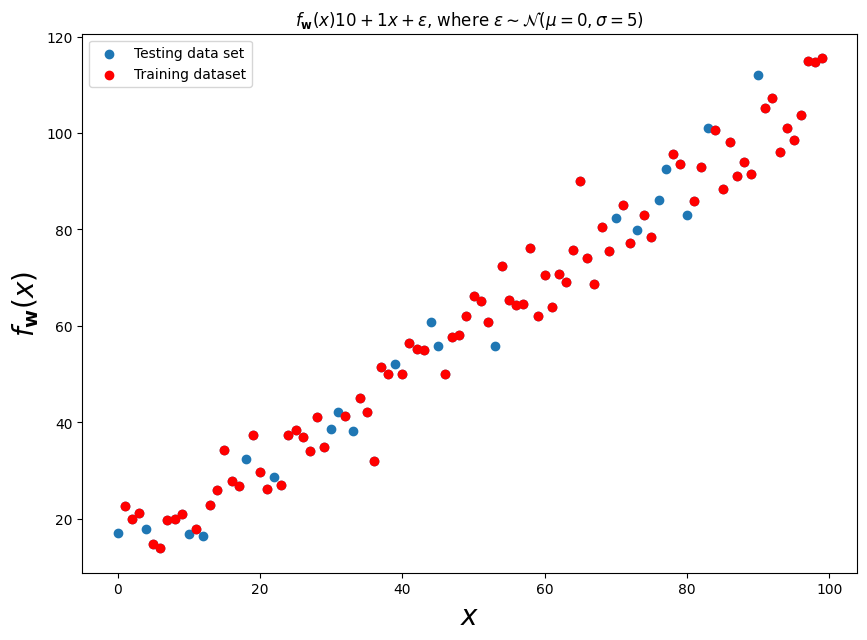

In [6]:
#Split the data into trainnig and testing sets train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

#Visualise the generated synthetic dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label= 'Testing data set')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$")
fontsize=20
plt.legend()
plt.show()

#### Contruye un modelo de regresion lineal y prepara para que los datos sean entrenados

- tf.keras.sequential([]): Define un modelo secuencial en Keras, este quiere decir que las capas se apilan en orden
- tf.keras.layers.inputs(shape=(1,)): Añade una capa de entraada al modelo. 
- tf.keras.layers.Dense(1): Añade una capa densa al modelo con una sola neurona.
- model.compile(optimizer='adam', loss='mse'): configura el modelo para su entrenamiento
- loss=mse: especifica la funcion de perdida como el error cuadratico medio.


In [7]:
#Build the linear regresion model using a multiple-input single neuron
model= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(optimizer='adam', loss='mse')

- model.summary(): Basicamente se va generar un resuemn de la arquitectura del modelo, es lo que hace comando 

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

#### En esta parte del codigo basicamente se entrena el modelo con los datos de entrenamiento y a su vez se evalua el desempeño.

- epochs=500: Sera el numero de veces que el modelo tiene que iterar durante el entrenamiento
- batch_size=10: Tamaño del lote, quiere decir que es el numero de muestras que se utilizan para caluclar los gradientes antes de actualizar los pesos del modelo.
- validation_split=0.10: Esto establece el porcentaje de los datos de entrenamiento que se guardaran para validar el modelo durante el entrenamiento.
- verbose=1: Contrla la cantidad de informacion que se muestra durante el entrenamiento.
- Model.evaluate(): Calcula la perdida del modelo usando los datos de prueba (x_test y y_test)
- print(f'\nTest Loss: {loss}'): imprime la perdida del modelo en los datos de prueba 

In [9]:
#Train the model
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

# Evaluate the model
loss= model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 19758.4414 - val_loss: 26524.7520
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 21049.6797 - val_loss: 26353.6719
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18383.6680 - val_loss: 26192.4199
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 20559.0918 - val_loss: 26023.0898
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19429.8027 - val_loss: 25859.2969
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20204.4062 - val_loss: 25690.2461
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18737.3828 - val_loss: 25530.4004
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19743.6230 - val_loss: 25378.9512
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 20316.0977 - val_loss: 25222.1426
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 20640.4746 - val_loss: 25062.1641
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 18346.2305 - val_los

#### La funcio nde esta parte del codigo es basicamente mostar los pesos y sesgos de los datos, esto es util para observar lo que el modelo ha aprendido.

- model.layers[0]: Accede a la primera capa del modelo 
- get_weights(): obtiene los pesos y sesgos de la capa antes requerida 
- weights[0]: Pesos de la capa requerida
- weights[1] Sesgos de la capa requerida
- print (f"Weights [w1]: {weights[0]}"): muetsra los pesos de la capa
- print(f"Biases [w0]: {weights[1]}"): muestra los sesgos de la capa

In [10]:
# Print the weights of the trained model
weights= model.layers[0]. get_weights()
print(f"Weights [w1]:{weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]:[[1.004951]]
Biases [w0]: [2.475499]


#### Esta parte del codigo esta realizando repdicciones utilizando modelos entrenados.

- model.predict(x_test): Usa el modelo para hacer predicciones sobre los datos de prueba, posteriormente genera las predicciones para la muestra de x_test
- model.predict(x_train): usa el modelo para hacer predicciones sobre los datos de entrenamiento.

In [11]:
#Make predictions
y_pred= model.predict(x_test)

#Make predictions
y_pred_train = model.predict(x_train)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


#### En este parte del codigo se genera un codigo que genera una grafica que muestra los datos de entrenamiento y sus respectivas predicciones.

- plt.figure(figsize=(12, 6)): Crea una nueva figura con un tamaño de 12x6 pulgadas.

- plt.scatter(x_train, y_train, label='Training data'): Crea un gráfico de dispersión de los datos de entrenamiento (x_train, y_train). 

- plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1, 0, 0]): Traza una línea que representa las predicciones del modelo sobre los datos de entrenamiento.La línea será de color rojo ([1, 0, 0]) y tendrá un grosor de 3 puntos.

- plt.xlabel(r'$x$', fontsize=20): Etiqueta el eje x con "x", usando LaTeX para una representación matemática y con un tamaño de fuente de 20 puntos.

- plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20): Etiqueta el eje y con la función estimada por el modelo, usando LaTeX para una representación matemática y con un tamaño de fuente de 20 puntos.

<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
C:\Users\fcoom\AppData\Local\Temp\ipykernel_1696\2653316826.py:7: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)


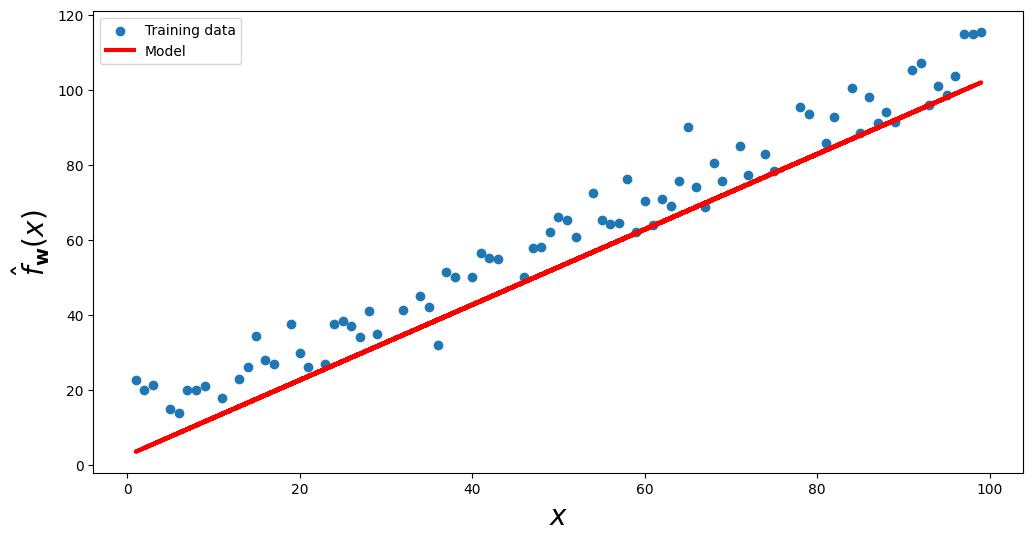

In [12]:
#Plot the results
plt.figure(figsize=(12, 6))

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)
plt.legend();

# Conclusion
- En conclusion esta actividad, aunque un tanto sencilla debido a que solo se tenia que explicar los comandos de un codigo ya dado, es bastante util debido que ayuda a saber que hace cada comando, en lo personal me ayudo debido a que no estoy tan familiarizado con el tema de python, pero me gusto el investigar y saber para que sirve cada uno de los comando. De igual manera me esta pareciendo interesante el curso y espero sacarle una aplicacion util en mi actual trabajo.

### Refencias Bibliograficas 

- TensorFlow Documentation. (n.d.). TensorFlow Keras API. Retrieved from https://www.tensorflow.org/api_docs/python/tf/keras
- Chollet, F. (2018). Deep learning with Python. Manning Publications.
- Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. doi:10.1109/MCSE.2007.55
- Matplotlib Documentation. (n.d.). Matplotlib Pyplot API. Retrieved from https://matplotlib.org/stable/api/pyplot.html